For this homework you will have to complete and implement the colour balancing for:

Gray world algorithm
Scale-by-max algorithm
You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

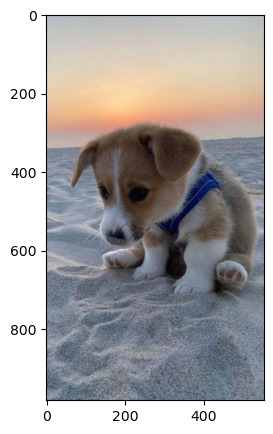

In [2]:
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

(<Axes: >, <matplotlib.image.AxesImage at 0x1c05660a810>)

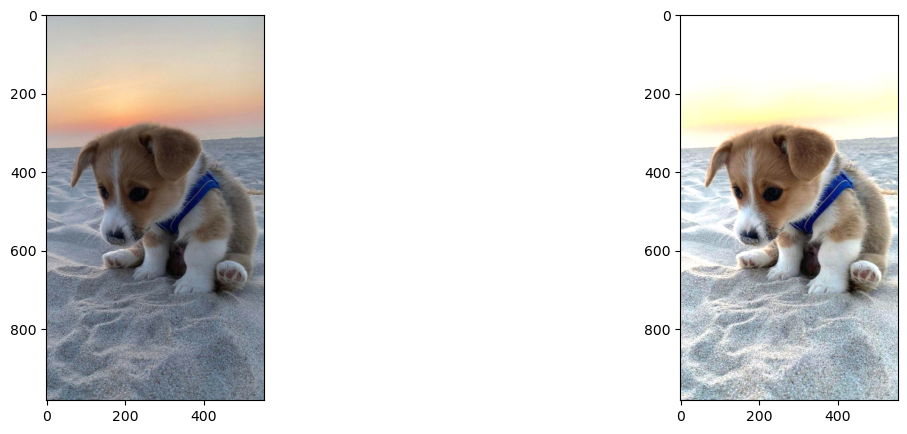

In [3]:
# Define white patch and the coefficients
row, col = 485, 553 
white = img[row, col, :]
coeffs = 255.0/white

# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

(<Axes: >, <matplotlib.image.AxesImage at 0x1c055e805d0>)

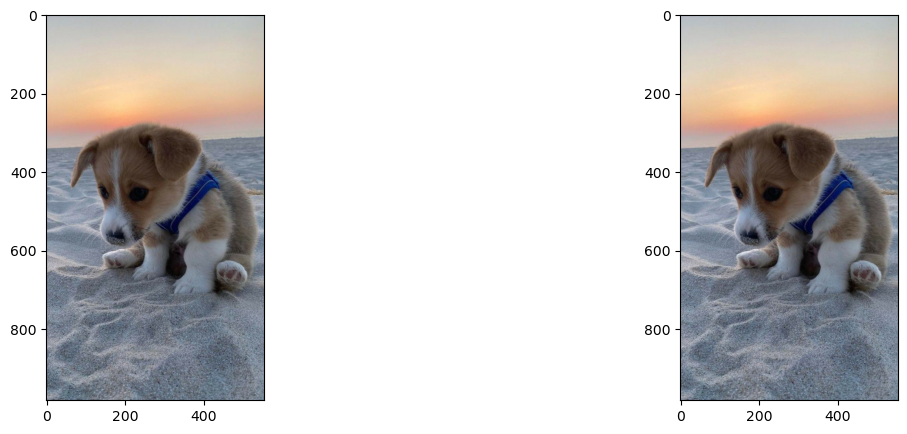

In [4]:
# Load your image
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the mean values for all three colour channels (red, green, blue)
red, green, blue = cv2.split(img)
mean_r = np.mean(red)
mean_g = np.mean(green)
mean_b = np.mean(blue)

# Compute the coefficients kr, kg, kb
mean_gray = (mean_r + mean_g + mean_b) / 3
if mean_r >= mean_g and mean_r >= mean_b:
    kr = 1
    kg = mean_gray / mean_g  
    kb = mean_gray / mean_b  
elif mean_g >= mean_b and mean_g >= mean_r:
    kg = 1
    kr = mean_gray / mean_r
    kb = mean_gray / mean_b
else:
    kb = 1
    kr = mean_gray / mean_r
    kg = mean_gray / mean_g  
    
coeffs = np.array([kr, kg, kb])    

# Apply color balancing and generate the balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# Clip the values to ensure they stay within the valid range [0, 255]
balanced = np.clip(balanced, 0, 255)

# Convert the balanced image to uint8 format for display
balanced = balanced.astype(np.uint8)

# Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)


(<Axes: >, <matplotlib.image.AxesImage at 0x1c055ec4110>)

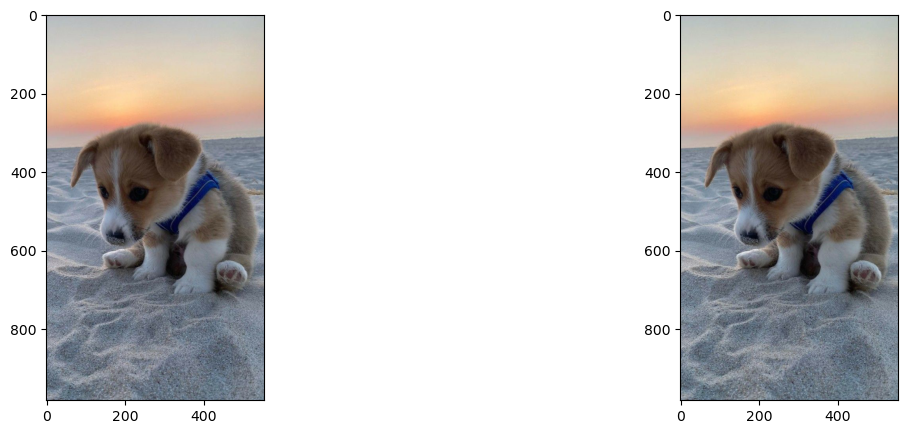

In [5]:
# Load your image
img = cv2.imread('dog.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Compute the maximum values for all three colour channels (red, green, blue)
red, green, blue = cv2.split(img)
# Compute the maximum value for each channel
max_r = np.max(red)
max_g = np.max(green)
max_b = np.max(blue)

# Apply scale-by-max balancing for each channel
scaled_red = (red / max_r) * 255
scaled_green = (green / max_g) * 255
scaled_blue = (blue / max_b) * 255

# Clip the values to stay within the valid range [0, 255]
scaled_red = np.clip(scaled_red, 0, 255).astype(np.uint8)
scaled_green = np.clip(scaled_green, 0, 255).astype(np.uint8)
scaled_blue = np.clip(scaled_blue, 0, 255).astype(np.uint8)

# Merge the balanced channels back into an image
balanced = cv2.merge([scaled_red, scaled_green, scaled_blue])


plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

1. Gray World Algorithm:
The Gray World algorithm is a basic color balancing method based on the assumption that, in an ideal balanced image, the average value of each color channel (red, green, and blue) should be equal and neutral (gray). The algorithm tries to adjust the intensity of each channel so that their averages align.

Steps of the Gray World Algorithm:

Compute the average pixel values for each color channel.
Compute the global average (mean of all channel averages).
Adjust each channel by scaling it according to the ratio of the global average to the channel's mean.
Usefulness: This method works well for images that have a near-neutral color distribution, such as natural scenes with diverse colors.

Limitations: It might not perform well on images with strong tints or images dominated by one color because it assumes the scene has an approximately even color distribution.

2. Scale-by-Max:
The Scale-by-Max method is another color correction technique. In this approach, each color channel (red, green, and blue) is scaled by dividing each pixel by the maximum value found in that channel, then multiplying by 255 to normalize the range.

Steps of the Scale-by-Max Algorithm:

Find the maximum pixel value for each color channel.
Scale all pixels in each channel by dividing by the channel's maximum and multiplying by 255.
Usefulness: This approach ensures that the brightest pixel in each color channel is scaled to 255, preserving maximum intensity. It’s simple and quick to apply.

Limitations: Since it's sensitive to noise or outliers (such as very bright or saturated pixels), it might cause some unintended results, such as oversaturation or distortion in colors.